### Student Information
Name: 張亞錫

Student ID: 112062530

GitHub ID: timothy0203

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Part 1

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Conclusion
8. References

### >>> **Import packages**

In [123]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import os
import nltk


### >>> **Exercise 2 (take home)** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [43]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [44]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [45]:
#Answer here
X.loc[lambda df: df['category'] == 1, :]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
...,...,...,...
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,1,comp.graphics
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [46]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [47]:
# Answer here
Answer = 'if the missing data are in the string format "None" or "Nan" or "", which will return as False when calling the isnull()'

### >>> **Exercise 6 (take home)**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [48]:
X_sample = X.sample(n=1000,random_state=42) #random state

In [49]:
print(X[:4])
print(X_sample[:4])
print(f'X len: {len(X)}')
print(f'X_sample len: {len(X_sample)}')

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
                                                   text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
X len: 2257
X_sample len: 10

In [50]:
# Answer here
Answer = '''
1. the order has been shuffle for the X_sample
2. the len of X_sample is 1000 while X is 2257
'''

### >>> **Exercise 8 (take home)** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: >

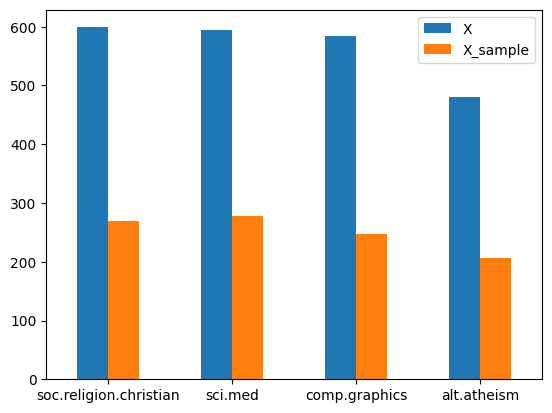

In [51]:
# Answer here

#bar chart
compound_bar_df = pd.DataFrame({'X': X.category_name.value_counts(), 'X_sample': X_sample.category_name.value_counts()}).sort_values(by='X', ascending=False)

compound_bar_df.plot.bar(rot=0)


### >>> **Exercise 10 (take home)**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [52]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [53]:
# Answer
# we can use the index with value as 1 to print the word
for i in range(len(X_counts[4, 0:100].toarray()[0])):
    if X_counts[4, 0:100].toarray()[0][i] == 1:
        print(count_vect.get_feature_names_out()[i])

00
01


### >>> **Exercise 11 (take home)** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,...,term_zvi,term_zvonko,term_zwart,term_zyeh,term_zyklon,term_zyxel,term_zz,term_zzz,term_ªl,term_íålittin
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


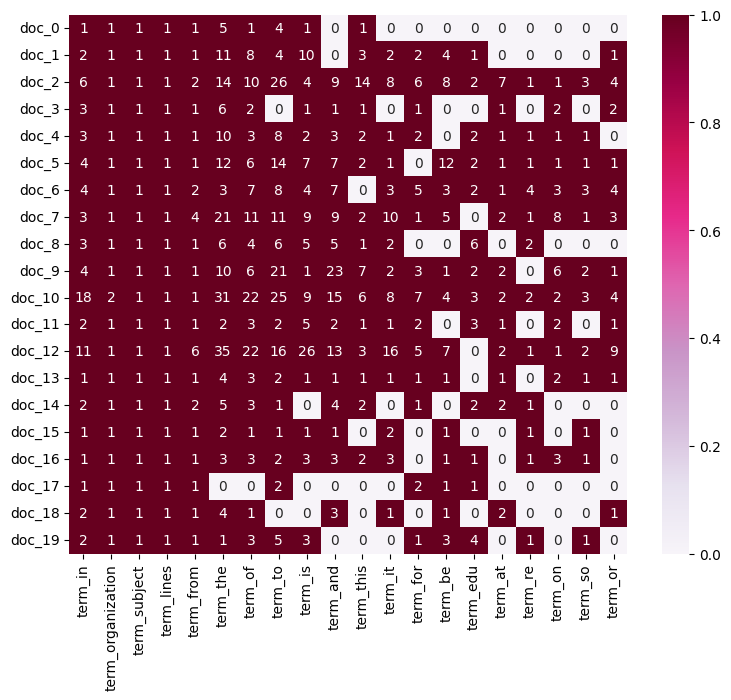

In [56]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, :].toarray() #X_counts[how many documents, how many terms]
plot_z
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
# Calculate the number of non-zero entries (documents) for each term
term_document_counts = (df_todraw != 0).sum(axis=0)
# Sort terms based on the number of documents they appear in
sorted_terms = term_document_counts.sort_values(ascending=False)
# Select the top-n terms
n = 20  # Change this to the desired number of top terms
top_n_terms = sorted_terms.index[:n]
# Create a new DataFrame containing only the top-n terms
df_top_n = df_todraw[top_n_terms]
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_top_n,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> **Exercise 12 (take home)**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

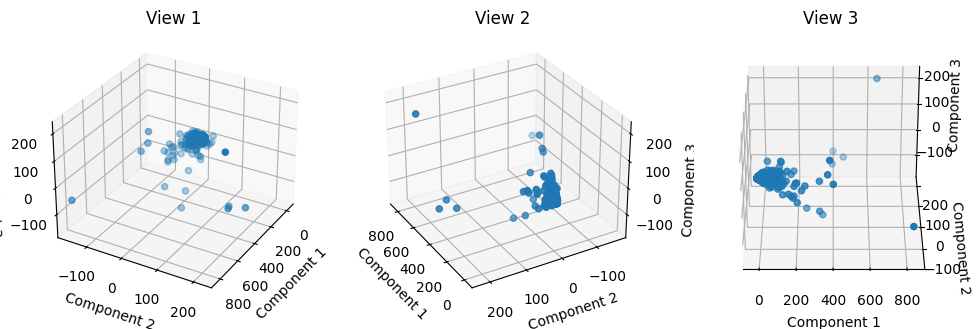

In [59]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

# Perform PCA with 3 components
n_components = 3
X_reduced = PCA(n_components=n_components).fit_transform(X_counts.toarray())

# Perform PCA with 3 components
n_components = 3
X_reduced = PCA(n_components=n_components).fit_transform(X_counts.toarray())

# Create a 3-D plot
fig = plt.figure(figsize=(12, 6))

# Generate multiple views from different angles
angles = [(30, 30), (30, 150), (30, 270)]  # (elevation, azimuth) angles
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(131 + i, projection='3d')
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
    ax.view_init(elev=elev, azim=azim)  # Set the view angle
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title(f'View {i+1}')

# Save or display the plot
plt.show()


### >>> **Exercise 13 (take home)**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [65]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [67]:
# Answer here
limit = 300
# Create a DataFrame with the top terms and their frequencies
df = pd.DataFrame({
    "Term": count_vect.get_feature_names_out()[:limit],
    "Frequency": term_frequencies[:limit]
})

# Create an interactive bar plot using Plotly Express
fig = px.bar(df, x="Term", y="Frequency", text="Frequency", title="Top Terms and Their Frequencies")
fig.update_traces(texttemplate='%{text}', textposition='outside')  # Show frequency on top of bars
fig.update_xaxes(categoryorder='total ascending')  # Sort the terms by frequency

# Customize the layout
fig.update_layout(
    xaxis_title="Term",
    yaxis_title="Frequency",
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the interactive plot in a Jupyter Notebook
fig.show()

result:
![](https://hackmd.io/_uploads/SJBRiyNfp.png)

### >>> **Exercise 14 (take home)** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [ ]:
# Answer here

# Assuming you have defined count_vect, term_frequencies, and a limit (e.g., 300) as you mentioned
limit = 50
# Create a DataFrame with the top terms and their frequencies
df = pd.DataFrame({
    "Term": count_vect.get_feature_names_out()[:limit],
    "Frequency": term_frequencies[:limit]
})

# Create an interactive bar plot using Plotly Express
fig = px.bar(df, x="Term", y="Frequency", text="Frequency", title="Top Terms and Their Frequencies")
fig.update_traces(texttemplate='%{text}', textposition='outside')  # Show frequency on top of bars
fig.update_xaxes(categoryorder='total ascending')  # Sort the terms by frequency

# Customize the layout
fig.update_layout(
    xaxis_title="Term",
    yaxis_title="Frequency",
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the interactive plot in a Jupyter Notebook
fig.show()

results:
![](https://hackmd.io/_uploads/r1wfO1Vf6.png)

### >>> **Exercise 15 (take home)** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here
import plotly.express as px
import pandas as pd

# Assuming you have defined count_vect, term_frequencies, and a limit (e.g., 300) as you mentioned

# Create a DataFrame with the top terms and their frequencies
df = pd.DataFrame({
    "Term": count_vect.get_feature_names_out()[:limit],
    "Frequency": term_frequencies[:limit]
})

# Sort the DataFrame by Frequency in descending order
df = df.sort_values(by="Frequency", ascending=False)

# Create an interactive bar plot using Plotly Express
fig = px.bar(df, x="Term", y="Frequency", text="Frequency", title="Top Terms and Their Frequencies")
fig.update_traces(texttemplate='%{text}', textposition='outside')  # Show frequency on top of bars

# Customize the layout
fig.update_layout(
    xaxis_title="Term",
    yaxis_title="Frequency",
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the interactive plot in a Jupyter Notebook
fig.show()

result:
![](https://hackmd.io/_uploads/H1zKoJ4Gp.png)

### >>> **Exercise 16 (take home)**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [69]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# Part 2

## 1. The Data, 2. Data Preparation, and 3. Data Transformation

In [70]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

read in the data as dataframe, with three column, the schema: index, sentence, score, and source

In [91]:
path = "sentiment+labelled+sentences/sentiment labelled sentences"

# List of file names
file_names = [os.path.join(path, 'amazon_cells_labelled.txt'), os.path.join(path, 'imdb_labelled.txt'), os.path.join(path, 'yelp_labelled.txt')]

# Initialize an empty list to store data from each file
data_list = []

# Loop through the files and read data
for file_name in file_names:
    source = file_name.split("\\")[-1].split(".")[0]
    with open(file_name, 'r', encoding="utf-8") as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                sentence, score = parts
                data_list.append({'sentence': sentence, 'score': int(score), 'source': source})

# Create a DataFrame from the collected data
X = pd.DataFrame(data_list)

# Print the first few rows of the DataFrame
X

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled
2996,Appetite instantly gone.,0,yelp_labelled
2997,Overall I was not impressed and would not go b...,0,yelp_labelled
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled


In [92]:
X[:10]

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled
9,What a waste of money and time!.,0,amazon_cells_labelled


In [94]:
X["source"].value_counts()

amazon_cells_labelled    1000
imdb_labelled            1000
yelp_labelled            1000
Name: source, dtype: int64

In [95]:
X["score"].mean()

0.5

### >>> **Exercise 2 (take home)** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [114]:
#Answer here
# try to select out all the positive cases on the score
X.loc[lambda df: df['score'] == 1, :]

,sentence,score,source
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled
10,And the sound quality is great.,1,amazon_cells_labelled
...,...,...,...
2899,"Overall, a great experience.",1,yelp_labelled
2901,Their regular toasted bread was equally satisf...,1,yelp_labelled
2907,The chips and sals a here is amazing!!!!!!!!!!...,1,yelp_labelled
2909,This is my new fav Vegas buffet spot.,1,yelp_labelled


## 4. Data Mining using Pandas

In [97]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [101]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])
dummy_series.to_frame().T

,sentence,score
0,dummy_record,1


In [105]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [106]:
# check if the records was commited into result
len(result_with_series)

3001

In [107]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [108]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
len(X)

3001

In [109]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [112]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [115]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [116]:
# Answer here
Answer = 'if the missing data are in the string format "None" or "Nan" or "", which will return as False when calling the isnull()'

## 5.  Data Preprocessing

### >>> **Exercise 6 (take home)**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [117]:
X_sample = X.sample(n=1000,random_state=42) #random state
print(X[:4])
print(X_sample[:4])
print(f'X len: {len(X)}')
print(f'X_sample len: {len(X_sample)}')

                                            sentence  score  \
0  So there is no way for me to plug it in here i...      0   
1                        Good case, Excellent value.      1   
2                             Great for the jawbone.      1   
3  Tied to charger for conversations lasting more...      0   

                  source  
0  amazon_cells_labelled  
1  amazon_cells_labelled  
2  amazon_cells_labelled  
3  amazon_cells_labelled  
                                               sentence  score  \
1801                              Avoid at ALL costs!        0   
1190  Garbo, who showed right off the bat that her t...      1   
1817  You will leave the theater wanting to go out a...      1   
251           O my gosh the best phone I have ever had.      1   

                     source  
1801          imdb_labelled  
1190          imdb_labelled  
1817          imdb_labelled  
251   amazon_cells_labelled  
X len: 3000
X_sample len: 1000


In [119]:
# Answer here
Answer = '''
1. the order has been shuffle for the X_sample
2. the len of X_sample is 1000 while X is 3000
'''

0    1500
1    1500
Name: score, dtype: int64


<Axes: >

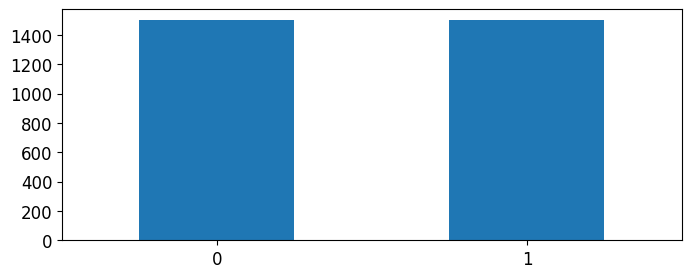

In [120]:
# Answer here

print(X.score.value_counts())

# plot barchart for X
X.score.value_counts().plot(kind = 'bar',
                            rot = 0, fontsize = 12, figsize = (8,3))

1    501
0    499
Name: score, dtype: int64


<Axes: >

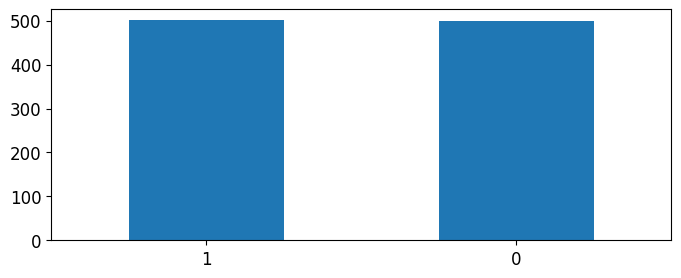

In [121]:
# Answer here

print(X_sample.score.value_counts())

# plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                            rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home)** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: >

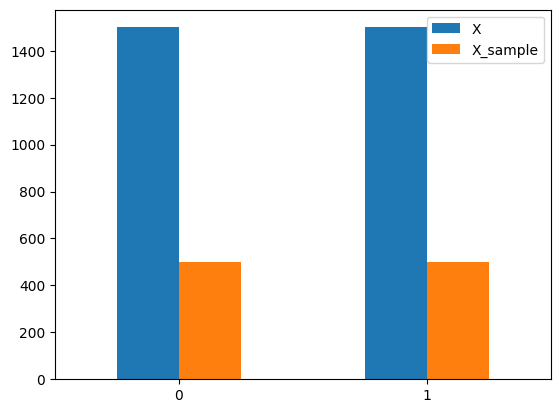

In [122]:
# Answer here

#bar chart
compound_bar_df = pd.DataFrame({'X': X.score.value_counts(), 'X_sample': X_sample.score.value_counts()}).sort_values(by='X', ascending=False)

compound_bar_df.plot.bar(rot=0)


In [124]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\張亞錫\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [126]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

### >>> **Exercise 10 (take home)**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [134]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix

In [156]:
count_vect = CountVectorizer()

X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix

X_sub_counts = X_counts[3, 0:1000].toarray()

X_sub_counts

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [157]:
# Answer
# we can use the index with value as 1 to print the word
for i in range(len(X_counts[3, 0:1000].toarray()[0])):
    if X_counts[3, 0:1000].toarray()[0][i] == 1:
        print(count_vect.get_feature_names_out()[i])

45
charger


### >>> **Exercise 11 (take home)** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_yucky,term_yukon,term_yum,term_yummy,term_yun,term_z500a,term_zero,term_zillion,term_zombie,term_zombiez
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


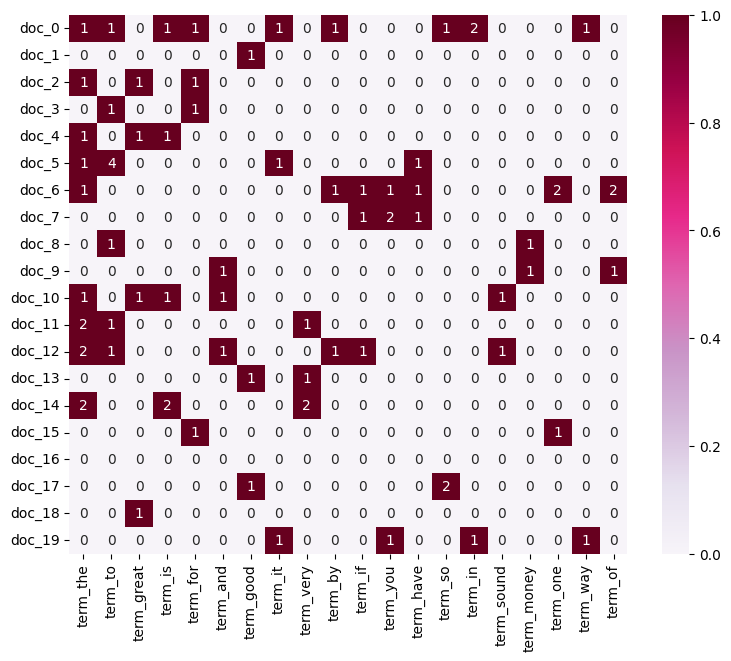

In [158]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, :].toarray() #X_counts[how many documents, how many terms]
plot_z
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
# Calculate the number of non-zero entries (documents) for each term
term_document_counts = (df_todraw != 0).sum(axis=0)
# Sort terms based on the number of documents they appear in
sorted_terms = term_document_counts.sort_values(ascending=False)
# Select the top-n terms
n = 20  # Change this to the desired number of top terms
top_n_terms = sorted_terms.index[:n]
# Create a new DataFrame containing only the top-n terms
df_top_n = df_todraw[top_n_terms]
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_top_n,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> **Exercise 12 (take home)**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

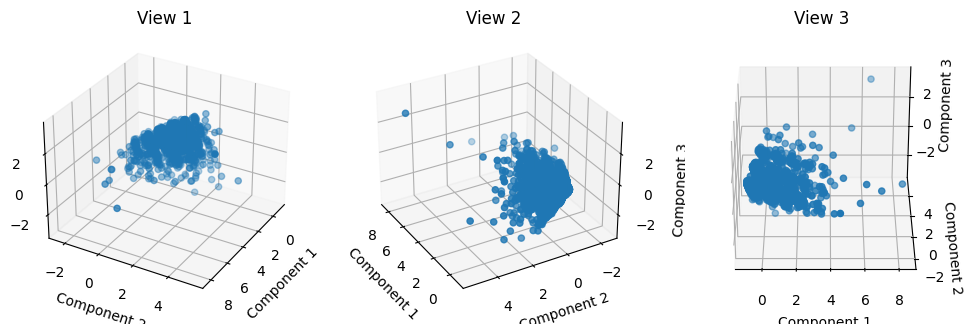

In [159]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

# Perform PCA with 3 components
n_components = 3
X_reduced = PCA(n_components=n_components).fit_transform(X_counts.toarray())

# Perform PCA with 3 components
n_components = 3
X_reduced = PCA(n_components=n_components).fit_transform(X_counts.toarray())

# Create a 3-D plot
fig = plt.figure(figsize=(12, 6))

# Generate multiple views from different angles
angles = [(30, 30), (30, 150), (30, 270)]  # (elevation, azimuth) angles
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(131 + i, projection='3d')
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
    ax.view_init(elev=elev, azim=azim)  # Set the view angle
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title(f'View {i+1}')

# Save or display the plot
plt.show()


### >>> **Exercise 13 (take home)**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [160]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


5155


In [168]:
# Answer here
# Calculate term frequencies directly from the X_counts matrix
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Create a DataFrame for the top terms and their frequencies
limit = 300  # Change this to the desired number of top terms
df = pd.DataFrame({
    "Terms": count_vect.get_feature_names_out()[:limit],
    "Frequencies": term_frequencies[:limit]
})

# Create an interactive bar chart
fig = px.bar(df, x="Terms", y="Frequencies", title="Top Terms and Their Frequencies")
fig.update_xaxes(title="Terms")
fig.update_yaxes(title="Frequencies")

# Show the interactive plot
fig.show()

result:
![](https://hackmd.io/_uploads/rJFjJh4fT.png)

### >>> **Exercise 14 (take home)** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [162]:
# Answer here
# Calculate term frequencies directly from the X_counts matrix
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Create a DataFrame for the top terms and their frequencies
limit = 50  # Change this to the desired number of top terms
df = pd.DataFrame({
    "Terms": count_vect.get_feature_names_out()[:limit],
    "Frequencies": term_frequencies[:limit]
})

# Create an interactive bar chart
fig = px.bar(df, x="Terms", y="Frequencies", title="Top Terms and Their Frequencies")
fig.update_xaxes(title="Terms")
fig.update_yaxes(title="Frequencies")

# Show the interactive plot
fig.show()

result:
![](https://hackmd.io/_uploads/rk3skhVM6.png)

### >>> **Exercise 15 (take home)** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [164]:
# Answer here
# Calculate term frequencies directly from the X_counts matrix
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Create a DataFrame for the top terms and their frequencies
limit = 300  # Change this to the desired number of top terms
df = pd.DataFrame({
    "Terms": count_vect.get_feature_names_out()[:limit],
    "Frequencies": term_frequencies[:limit]
})
# Sort the DataFrame by Frequency in descending order
df = df.sort_values(by="Frequencies", ascending=False)

# Create an interactive bar chart
fig = px.bar(df, x="Terms", y="Frequencies", title="Top Terms and Their Frequencies")
fig.update_xaxes(title="Terms")
fig.update_yaxes(title="Frequencies")

# Show the interactive plot
fig.show()

result:
![](https://hackmd.io/_uploads/Bk0iy2Nfa.png)

### >>> **Exercise 16 (take home)**
Try to generate the binarization using the `category_name` column instead. Does it work?

read in the data as dataframe, with three column, the schema: index, sentence, score, and source

In [167]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)
X['bin_score'] = mlb.transform(X['score']).tolist()
X[0:9]

,sentence,score,source,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


# Part 3

# Part 4